![image.png](https://images.pexels.com/photos/3768712/pexels-photo-3768712.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260)

# Determine If A Point Lies Inside A Triangle

Kevin J. Walchko, Phd

---

A 3-simplex, with barycentric subdivisions of 1-faces (edges) 2-faces (triangles) and 3-faces (body).
In geometry, the barycentric coordinate system is a coordinate system in which the location of a point of a simplex (a triangle, tetrahedron, etc.) is specified as the center of mass, or barycenter, of usually unequal masses placed at its vertices. Coordinates also extend outside the simplex, where one or more coordinates become negative. The system was introduced (1827) by August Ferdinand Möbius.


## References

- [Stackoverflow: How to determine if a point is in a 2D triangle?](https://stackoverflow.com/questions/2049582/how-to-determine-if-a-point-is-in-a-2d-triangle)
- [Wikipedia: Barycentric coordinate system](https://en.wikipedia.org/wiki/Barycentric_coordinate_system)

In [1]:
%matplotlib inline 

In [10]:
from matplotlib import pyplot as plt
import numpy as np

In [80]:
def plot(pts, tri, title=None):
    plt.scatter([p[0] for p in tri]+[tri[0][0]], [p[1] for p in tri]+[tri[0][1]])
    plt.plot([p[0] for p in tri]+[tri[0][0]], [p[1] for p in tri]+[tri[0][1]])
    plt.scatter([p[0] for p in pts],[p[1] for p in pts])
    if title:
        plt.title(title)

In [68]:
def PointInsideTriangle2(pt,tri):
    '''checks if point pt(2) is inside triangle tri(3x2).'''
    a = 1/(-tri[1,1]*tri[2,0]+tri[0,1]*(-tri[1,0]+tri[2,0])+ \
        tri[0,0]*(tri[1,1]-tri[2,1])+tri[1,0]*tri[2,1])
    s = a*(tri[2,0]*tri[0,1]-tri[0,0]*tri[2,1]+(tri[2,1]-tri[0,1])*pt[0]+ \
        (tri[0,0]-tri[2,0])*pt[1])
    if s<0: return False
    else: t = a*(tri[0,0]*tri[1,1]-tri[1,0]*tri[0,1]+(tri[0,1]-tri[1,1])*pt[0]+ \
              (tri[1,0]-tri[0,0])*pt[1])
    return ((t>0) and (1-s-t>0))

In [69]:
# define the coordinates of our triangle corners
tri = np.array([
    [-2,1],
    [10,5],
    [4,9]
])

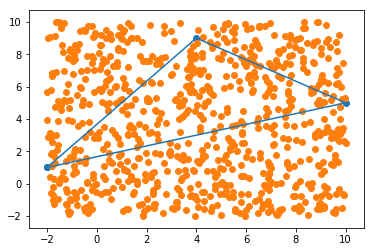

In [89]:
# pick a bunch of random points
num = 1600
pts = np.random.uniform(tri.min(),tri.max(),num).reshape((num//2,2))
plot(pts, tri)

In [90]:
# let's find which ones lie inside the triangle
res = []
for p in pts:
    ans = PointInsideTriangle2(p, tri)
    res.append(ans)
res = np.array(res)

In [91]:
# numpy allows us to filter the points based on the above step
good = pts[res==True]
bad = pts[res==False]

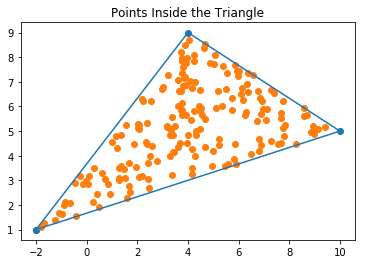

In [92]:
# plot the good points inside the triangle
plot(good, tri, "Points Inside the Triangle")

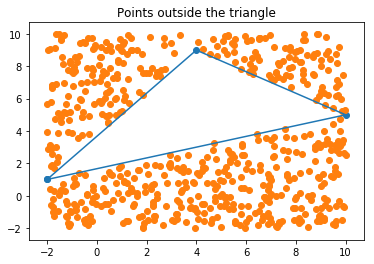

In [93]:
# plot the bad points outside of the triangle
plot(bad, tri, "Points outside the triangle")